<a href="https://colab.research.google.com/github/umang-algo/Plaksha_Projects/blob/main/Data_X_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library 

In [ ]:
#Importing All libararies
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from PIL import Image
import sys

## Import data from directory 

In [ ]:
#import and save images in the directory in form of dataframe.
import os
image_id = []
object_type = []
dir = '/content/drive/MyDrive/data/'
for dirname in os.listdir(dir):
    if dirname!='.DS_Store':
        for filename in os.listdir(dir+dirname):
              image_id.append(dir+dirname+'/'+filename)
              object_type.append(dirname)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(image_id, object_type)),columns = ['ImageID','Type'])

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
inp = df['ImageID']
out = df['Type']

In [ ]:
train_in,test_in,train_out,test_out = train_test_split(inp,out,random_state = 42,test_size = 0.2,stratify = out)      #splitting the data set   

In [ ]:
#Create an object from image data generator
data_gen = ImageDataGenerator(
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True,
                    fill_mode = 'nearest'
)

In [ ]:
#catenation of training input and output
train_x = pd.concat([train_in,train_out],axis=1)

In [ ]:
#datasets value 
from collections import Counter 
Counter(object_type)

Counter({'cat': 1185, 'kenye west': 1245, 'pikachu': 1040})

In [ ]:
#train images from whole dataset remain after spiliting 
train_generator = data_gen.flow_from_dataframe(
                    train_x ,x_col = "ImageID",y_col = "Type",
                    target_size = (200,200),
                    batch_size = 64)

Found 2776 validated image filenames belonging to 3 classes.


In [ ]:
#cancatinate the test input and test output 
test_x = pd.concat([test_in,test_out],axis=1)

In [ ]:
#no. of image for  validation after splittting
#image size (200,200,3)
val_generator = data_gen.flow_from_dataframe(
                    test_x,x_col = "ImageID",y_col = "Type",
                    target_size = (200,200),
                    batch_size = 64)

Found 694 validated image filenames belonging to 3 classes.


## Model

In [ ]:
#Using ResNET50 as transfer learining model
model = models.Sequential()
model.add(ResNet50(input_shape = (200,200, 3), include_top = False, weights = 'imagenet'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(3, activation = 'softmax'))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
#complile of model with categorical crossentropy and adam optimizer with learning rate 0.001
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [ ]:
#Fitting the model with epoch 10 and batch size 64
history = model.fit(train_generator,epochs = 10,
                    validation_data = val_generator)

Epoch 1/10
44/44 [==============================] - 617s 14s/step - loss: 11.2146 - accuracy: 0.7313 - val_loss: 49.1269 - val_accuracy: 0.5072
Epoch 2/10
44/44 [==============================] - 46s 1s/step - loss: 0.5351 - accuracy: 0.8894 - val_loss: 120.7422 - val_accuracy: 0.4914
Epoch 3/10
44/44 [==============================] - 46s 1s/step - loss: 0.2139 - accuracy: 0.9282 - val_loss: 27.6346 - val_accuracy: 0.7435
Epoch 4/10
44/44 [==============================] - 46s 1s/step - loss: 0.1881 - accuracy: 0.9362 - val_loss: 0.6941 - val_accuracy: 0.8790
Epoch 5/10
44/44 [==============================] - 45s 1s/step - loss: 0.1028 - accuracy: 0.9648 - val_loss: 0.0999 - val_accuracy: 0.9697
Epoch 6/10
44/44 [==============================] - 45s 1s/step - loss: 0.0758 - accuracy: 0.9734 - val_loss: 0.1150 - val_accuracy: 0.9582
Epoch 7/10
44/44 [==============================] - 46s 1s/step - loss: 0.0767 - accuracy: 0.9747 - val_loss: 0.0805 - val_accuracy: 0.9769
Epoch 8/10
44

## Prediction on Validation 

In [ ]:
#prediction of classes on validation dataset
pred= model.predict_classes(val_generator)
pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2,

In [ ]:
#mapping of array with their lables 
pred_1= pd.Series(pred).map({0:'Cat', 1:'kenye west',2:'pikachu'})


In [ ]:
list(pred_1)

['kenye west',
 'Cat',
 'Cat',
 'kenye west',
 'pikachu',
 'Cat',
 'kenye west',
 'pikachu',
 'kenye west',
 'kenye west',
 'pikachu',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'kenye west',
 'Cat',
 'kenye west',
 'kenye west',
 'pikachu',
 'Cat',
 'kenye west',
 'Cat',
 'kenye west',
 'pikachu',
 'pikachu',
 'Cat',
 'pikachu',
 'kenye west',
 'pikachu',
 'kenye west',
 'pikachu',
 'kenye west',
 'Cat',
 'kenye west',
 'kenye west',
 'kenye west',
 'pikachu',
 'Cat',
 'pikachu',
 'Cat',
 'pikachu',
 'kenye west',
 'pikachu',
 'kenye west',
 'Cat',
 'kenye west',
 'kenye west',
 'kenye west',
 'Cat',
 'kenye west',
 'kenye west',
 'Cat',
 'pikachu',
 'Cat',
 'kenye west',
 'pikachu',
 'pikachu',
 'kenye west',
 'kenye west',
 'Cat',
 'pikachu',
 'Cat',
 'pikachu',
 'kenye west',
 'kenye west',
 'pikachu',
 'Cat',
 'Cat',
 'kenye west',
 'Cat',
 'kenye west',
 'pikachu',
 'kenye west',
 'Cat',
 'Cat',
 'pikachu',
 'kenye west',
 'pikachu',
 'pikachu',
 'kenye west',
 'kenye west',
 'pikachu',
 '

In [ ]:
#predict the image with classs and Probabilities 
from tensorflow.keras.preprocessing import image
import numpy as np

def predict(path):
  img = image.load_img(path=path ,target_size=(200, 200,3))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  pred = model.predict(img_batch)
  prediction= np.argmax(pred,axis=1)
  class_indices = list(val_generator.class_indices.keys())
  return (class_indices[prediction[0]],max(pred[0])*100)

In [ ]:
#random image of Kenye West and prediction is correct with 99.95% probabilities 
predict('/content/drive/MyDrive/data/kenye west/1000.jpg')

('kenye west', 99.9506950378418)

In [ ]:
#import of confusion matrix using sklearn library
from sklearn.metrics import confusion_matrix
output = []
for x in test_in:
  output.append(predict(x)[0])

In [ ]:
#print 10 predicted output
output[:10]

['pikachu',
 'kenye west',
 'kenye west',
 'cat',
 'kenye west',
 'cat',
 'kenye west',
 'kenye west',
 'cat',
 'cat']

In [ ]:
list(test_out[:10])

['pikachu',
 'kenye west',
 'kenye west',
 'cat',
 'cat',
 'cat',
 'kenye west',
 'kenye west',
 'cat',
 'cat']

## Confusion matrix on Validation set 

In [ ]:
# Confusion matrix on Validation set 
confusion_matrix(list(test_out),output)

array([[177,  54,   6],
       [  0, 249,   0],
       [  0,  13, 195]])

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
np.linspace(0, 10, 10, endpoint=False)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Plotting of Accuracy and Losses 

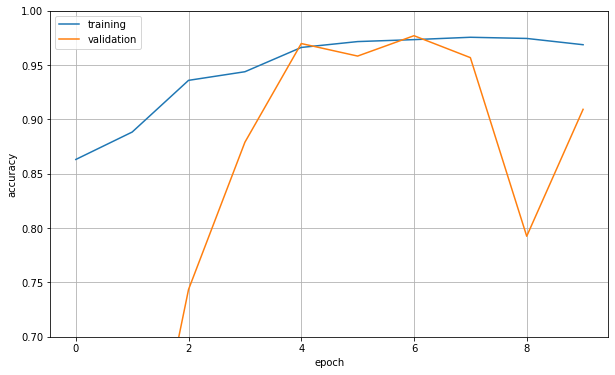

In [ ]:
#Using Matplotlib plot the training and validation accuracy in same plot with respect to epoch
X = pd.DataFrame({'epoch': np.linspace(0, 10, 10, endpoint=False),
                    'training': history.history['accuracy'],
                    'validation': history.history['val_accuracy']})
ax = X.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.7,1.0]);

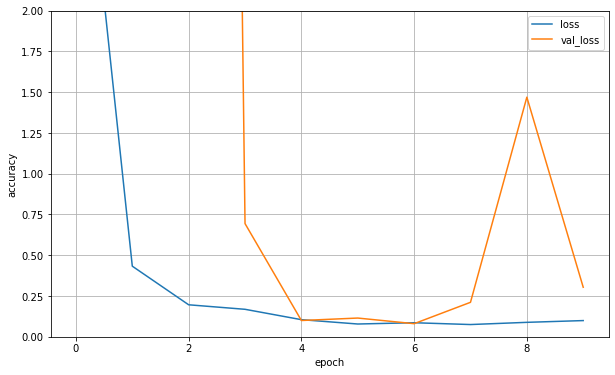

In [ ]:
#Using Matplotlib plot the training and validation accuracy in same plot
X = pd.DataFrame({'epoch': np.linspace(0, 10, 10, endpoint=False),
                    'loss': history.history['loss'],
                    'val_loss': history.history['val_loss']})
ax = X.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0,2.0]);

## Importing of test dataset

In [ ]:
#import test dataset using directory
import os
test_id = []
test_type = []
dir = '/content/drive/MyDrive/data/TEST/'
for dirname in os.listdir(dir):
    if dirname!='.DS_Store':
        for filename in os.listdir(dir+dirname):
              test_id.append(dir+dirname+'/'+filename)
              test_type.append(dirname)

In [ ]:
import numpy as np
test_res = []
prob_res = []
for add in test_id:
  if add!='/content/drive/MyDrive/data/TEST/Pikachu/.DS_Store':
    test_res.append(predict(add)[0])
    prob_res.append(predict(add)[1])

In [ ]:
test_res

['cat',
 'cat',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'cat',
 'kenye west',
 'cat',
 'pikachu',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'kenye west',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu',
 'pikachu']

## Confusion matrix for test dataset which have 3 class with 10 images 

In [ ]:
#confusion matrix for test dataset which have 3 class with 10 images 
confusion_matrix(test_type,test_res)

array([[ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 10],
       [ 0,  0,  4,  5,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

## Result 

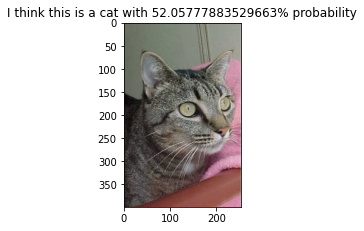

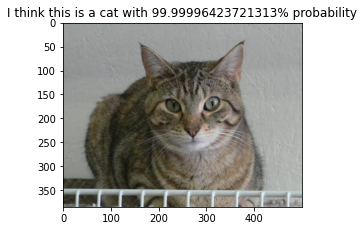

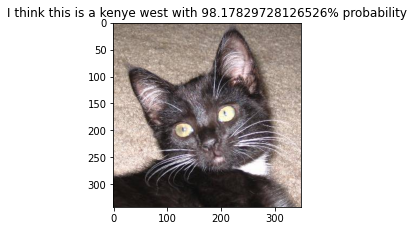

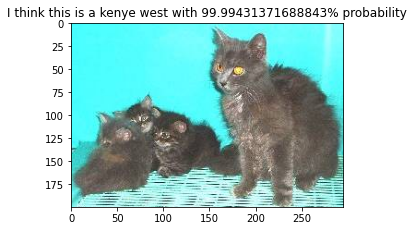

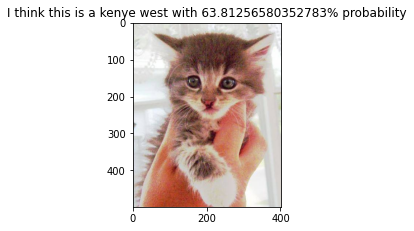

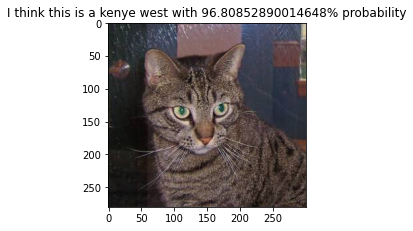

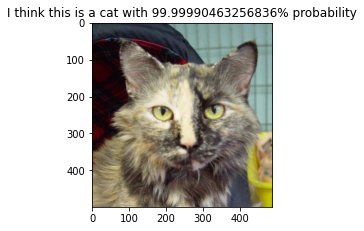

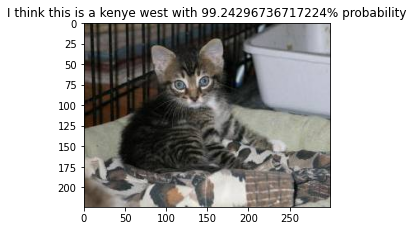

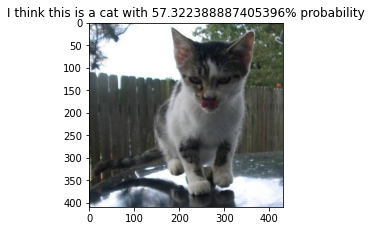

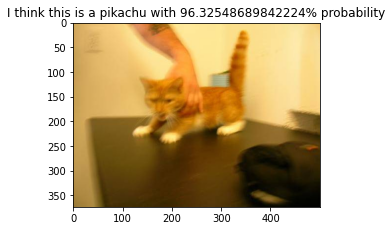

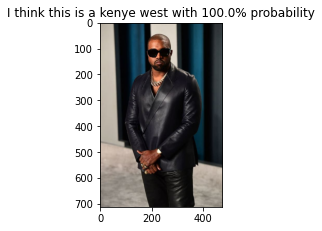

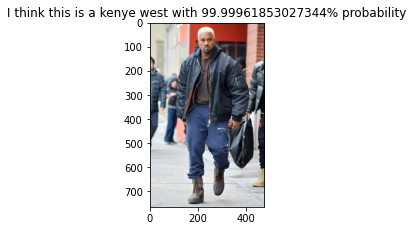

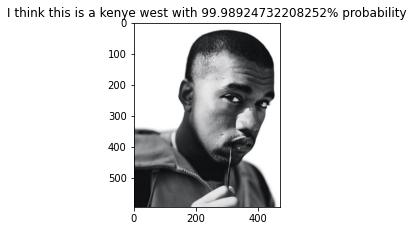

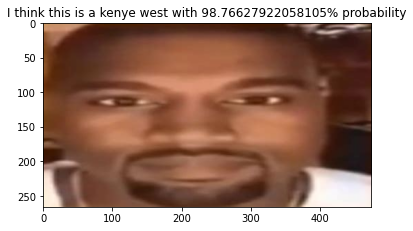

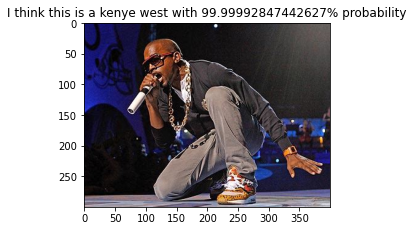

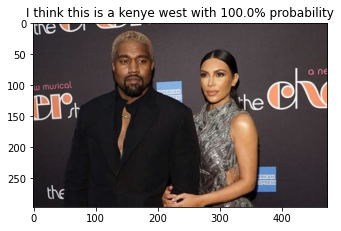

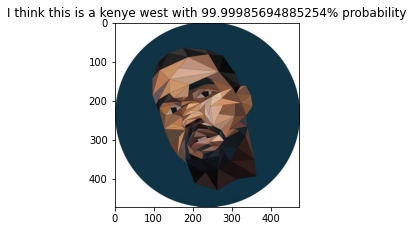

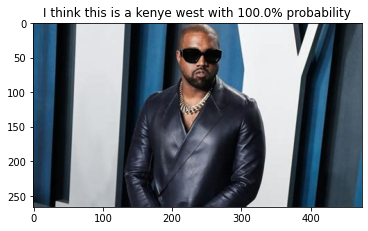

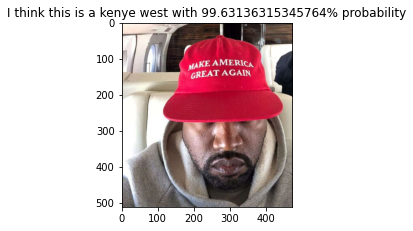

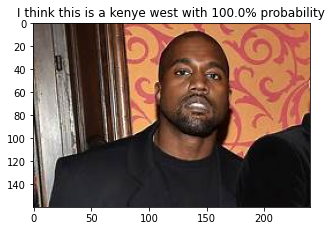

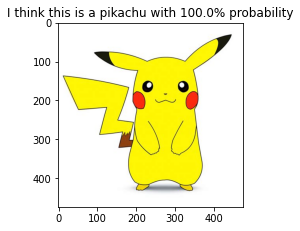

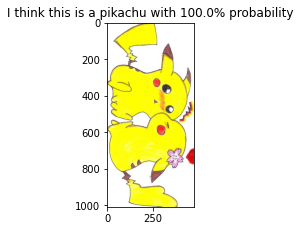

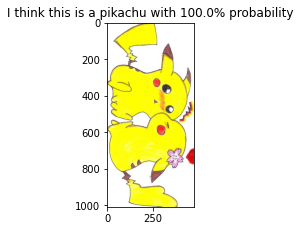

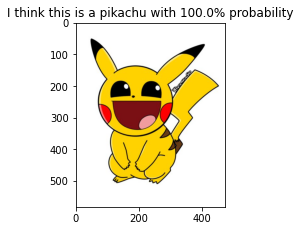

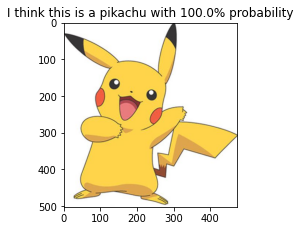

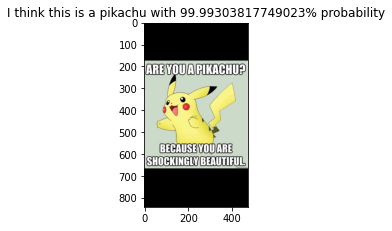

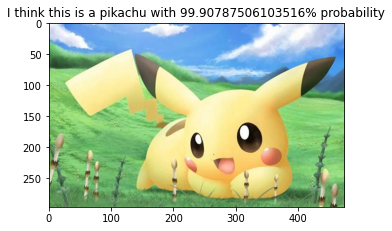

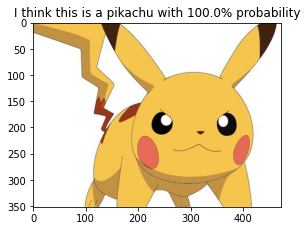

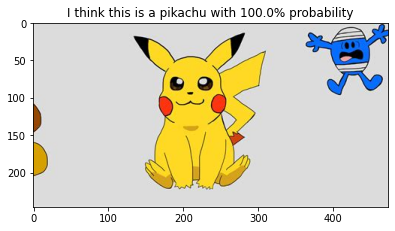

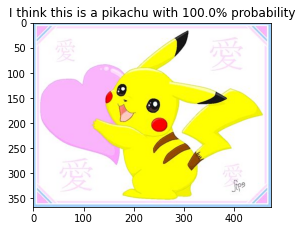

In [ ]:
#prediction of test dataset classes with lables and probability 
for j in range(len(test_id)):
  plt.figure(figsize = (40,40))
  plt.subplot(10,3,j+1)
  img = cv2.imread(test_id[j])
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title('I think this is a ' +test_res[j]+' with '+str(prob_res[j])+'% probability')
  plt.show()